Teste Estatistico


Análise para Alunos - coluna: 8. VOCÊ ACHA QUE APRENDEU COISAS NOVAS COM A ROBÓTICA?
8. VOCÊ ACHA QUE APRENDEU COISAS NOVAS COM A ROBÓTICA?
SIM, APRENDI MUITA COISA QUE NÃO SABIA              11
APRENDI ALGUMAS COISAS, MAS JÁ CONHECIA UM POUCO     3
APRENDI POUCO, NÃO ENTENDI MUITO BEM                 2
Name: count, dtype: int64


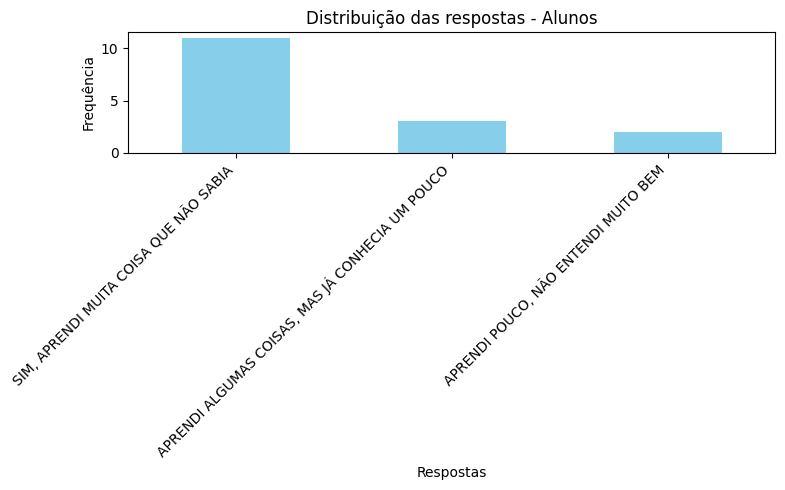

Teste Qui-quadrado: chi2 = 4.1345, p-valor = 0.1265

Análise para Professores - coluna: 4. VOCÊ ACREDITA QUE A ROBÓTICA CONTRIBUIU PARA O APRENDIZADO DOS ALUNOS?
A coluna '4. VOCÊ ACREDITA QUE A ROBÓTICA CONTRIBUIU PARA O APRENDIZADO DOS ALUNOS?' não foi encontrada em Professores.

Análise para Gestão - coluna: 3. VOCÊ CONSIDERA IMPORTANTE A ROBÓTICA NA ESCOLA?
A coluna '3. VOCÊ CONSIDERA IMPORTANTE A ROBÓTICA NA ESCOLA?' não foi encontrada em Gestão.

Análise geral: contagem por grupo e resposta
Resposta  APRENDI ALGUMAS COISAS, MAS JÁ CONHECIA UM POUCO  \
Grupo                                                        
Alunos                                                   3   

Resposta  APRENDI POUCO, NÃO ENTENDI MUITO BEM  \
Grupo                                            
Alunos                                       2   

Resposta  SIM, APRENDI MUITA COISA QUE NÃO SABIA  
Grupo                                             
Alunos                                        11  


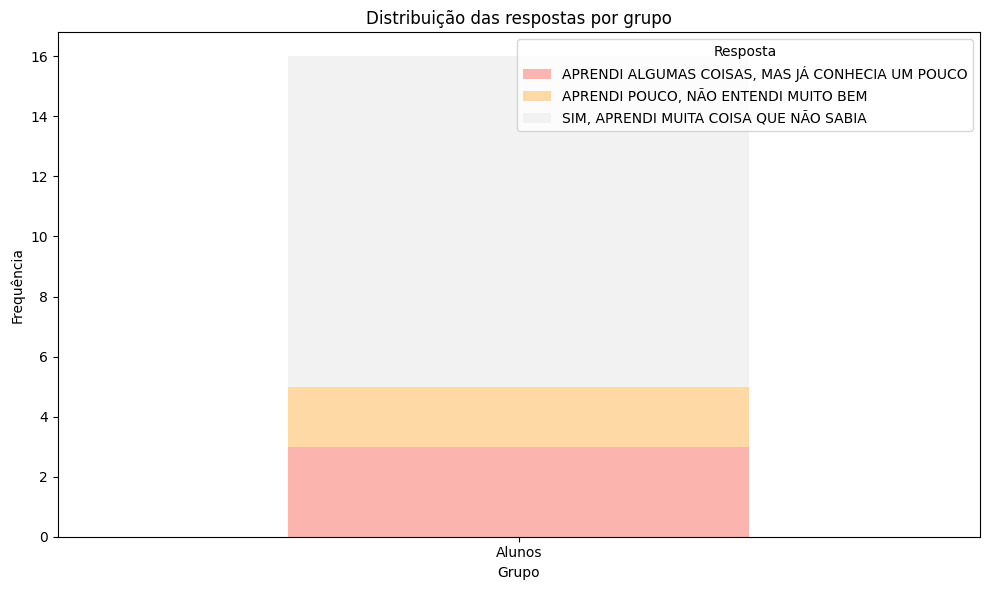

Teste Qui-quadrado geral: chi2 = 0.0000, p-valor = 1.0000, graus de liberdade = 0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Função para análise descritiva e teste qui-quadrado para uma coluna categórica
def analise_categorica(df, coluna, nome_grupo):
    print(f"\nAnálise para {nome_grupo} - coluna: {coluna}")
    df.columns = df.columns.str.strip()  # tira espaços extras

    if coluna not in df.columns:
        print(f"A coluna '{coluna}' não foi encontrada em {nome_grupo}.")
        return None

    freq = df[coluna].value_counts()
    print(freq)

    # Gráfico
    plt.figure(figsize=(8,5))
    freq.plot(kind='bar', color='skyblue')
    plt.title(f'Distribuição das respostas - {nome_grupo}')
    plt.xlabel('Respostas')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Teste Qui-quadrado para uniformidade
    esperado = [freq.sum() / len(freq)] * len(freq)
    chi2, p_valor = chi2_contingency([freq, esperado])[:2]
    print(f'Teste Qui-quadrado: chi2 = {chi2:.4f}, p-valor = {p_valor:.4f}')

    return freq

# Carregar arquivos (ajuste nomes/caminhos)
arquivo_alunos = 'respostas-alunos.xlsx'
arquivo_professores = 'respostas-professores.xlsx'
arquivo_gestao = 'respostas-gestao.xlsx'

df_alunos = pd.read_excel(arquivo_alunos)
df_professores = pd.read_excel(arquivo_professores)
df_gestao = pd.read_excel(arquivo_gestao)

# Ajuste os nomes das colunas de interesse conforme seus arquivos
coluna_alunos = '8. VOCÊ ACHA QUE APRENDEU COISAS NOVAS COM A ROBÓTICA?'
coluna_professores = '4. VOCÊ ACREDITA QUE A ROBÓTICA CONTRIBUIU PARA O APRENDIZADO DOS ALUNOS?'
coluna_gestao = '3. VOCÊ CONSIDERA IMPORTANTE A ROBÓTICA NA ESCOLA?'  # Ajuste conforme seu arquivo

# Análise individual
freq_alunos = analise_categorica(df_alunos, coluna_alunos, 'Alunos')
freq_prof = analise_categorica(df_professores, coluna_professores, 'Professores')
freq_gestao = analise_categorica(df_gestao, coluna_gestao, 'Gestão')

# Análise geral comparando os grupos

# Criar DataFrame unificado para a análise geral
def extrai_respostas(df, coluna, grupo_nome):
    df.columns = df.columns.str.strip()
    if coluna in df.columns:
        return df[[coluna]].rename(columns={coluna: 'Resposta'}).assign(Grupo=grupo_nome)
    else:
        return pd.DataFrame(columns=['Resposta', 'Grupo'])

df_geral = pd.concat([
    extrai_respostas(df_alunos, coluna_alunos, 'Alunos'),
    extrai_respostas(df_professores, coluna_professores, 'Professores'),
    extrai_respostas(df_gestao, coluna_gestao, 'Gestão')
], ignore_index=True)

print("\nAnálise geral: contagem por grupo e resposta")
contagem_geral = pd.crosstab(df_geral['Grupo'], df_geral['Resposta'])
print(contagem_geral)

# Gráfico de barras empilhadas para comparação geral
contagem_geral.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Pastel1')
plt.title('Distribuição das respostas por grupo')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Teste Qui-quadrado para independência entre grupo e resposta
chi2, p, dof, expected = chi2_contingency(contagem_geral)
print(f'Teste Qui-quadrado geral: chi2 = {chi2:.4f}, p-valor = {p:.4f}, graus de liberdade = {dof}')


Machine Learning


===== Análise Descritiva - Alunos =====
       2. QUAL A SUA IDADE?  \
count                    16   
unique                    6   
top                 11 ANOS   
freq                      5   

       4. VOCÊ GOSTOU DE PARTICIPAR DAS AULAS DE ROBÓTICA?  \
count                                                  16    
unique                                                  3    
top      SIM, GOSTEI MUITO E ME DIVERTI ENQUANTO APRENDIA    
freq                                                   12    

       8. VOCÊ ACHA QUE APRENDEU COISAS NOVAS COM A ROBÓTICA?  \
count                                                  16       
unique                                                  3       
top                SIM, APRENDI MUITA COISA QUE NÃO SABIA       
freq                                                   11       

       10. O USO DE PEÇAS E ROBÔS AJUDOU VOCÊ A ENTENDER MELHOR OS CONTEÚDOS?  \
count                                                  16                       
uniq

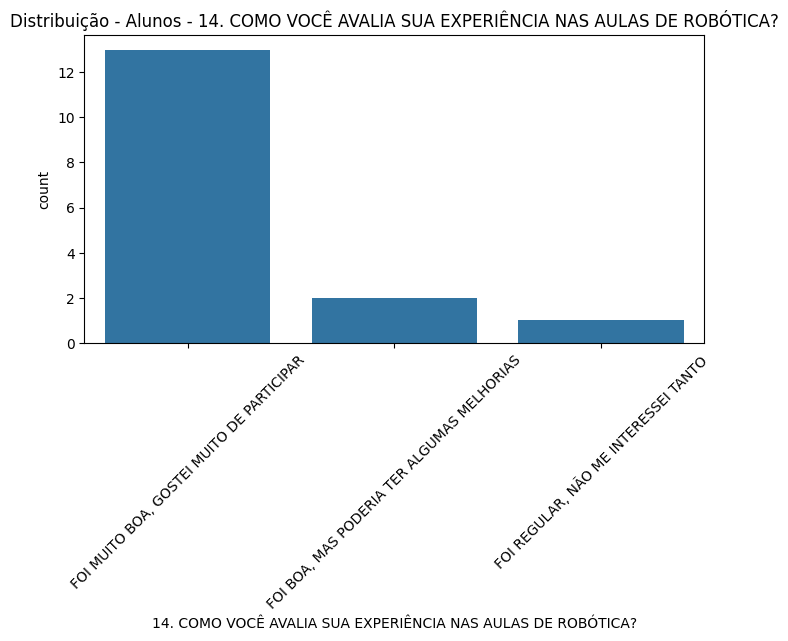


===== Análise Descritiva - Professores =====
       2.2. Acredita que os projetos de tecnologia, como a robótica, podem mitigar desigualdades educacionais?  \
count                                                   2                                                        
unique                                                  2                                                        
top     Sim, embora necessitem de complementação com p...                                                        
freq                                                    1                                                        

       2.3. Os alunos demonstraram entusiasmo e envolvimento com as atividades de robótica?  \
count                                                   2                                     
unique                                                  1                                     
top     Sim, a maioria se envolveu com interesse e ent...                                     
fre

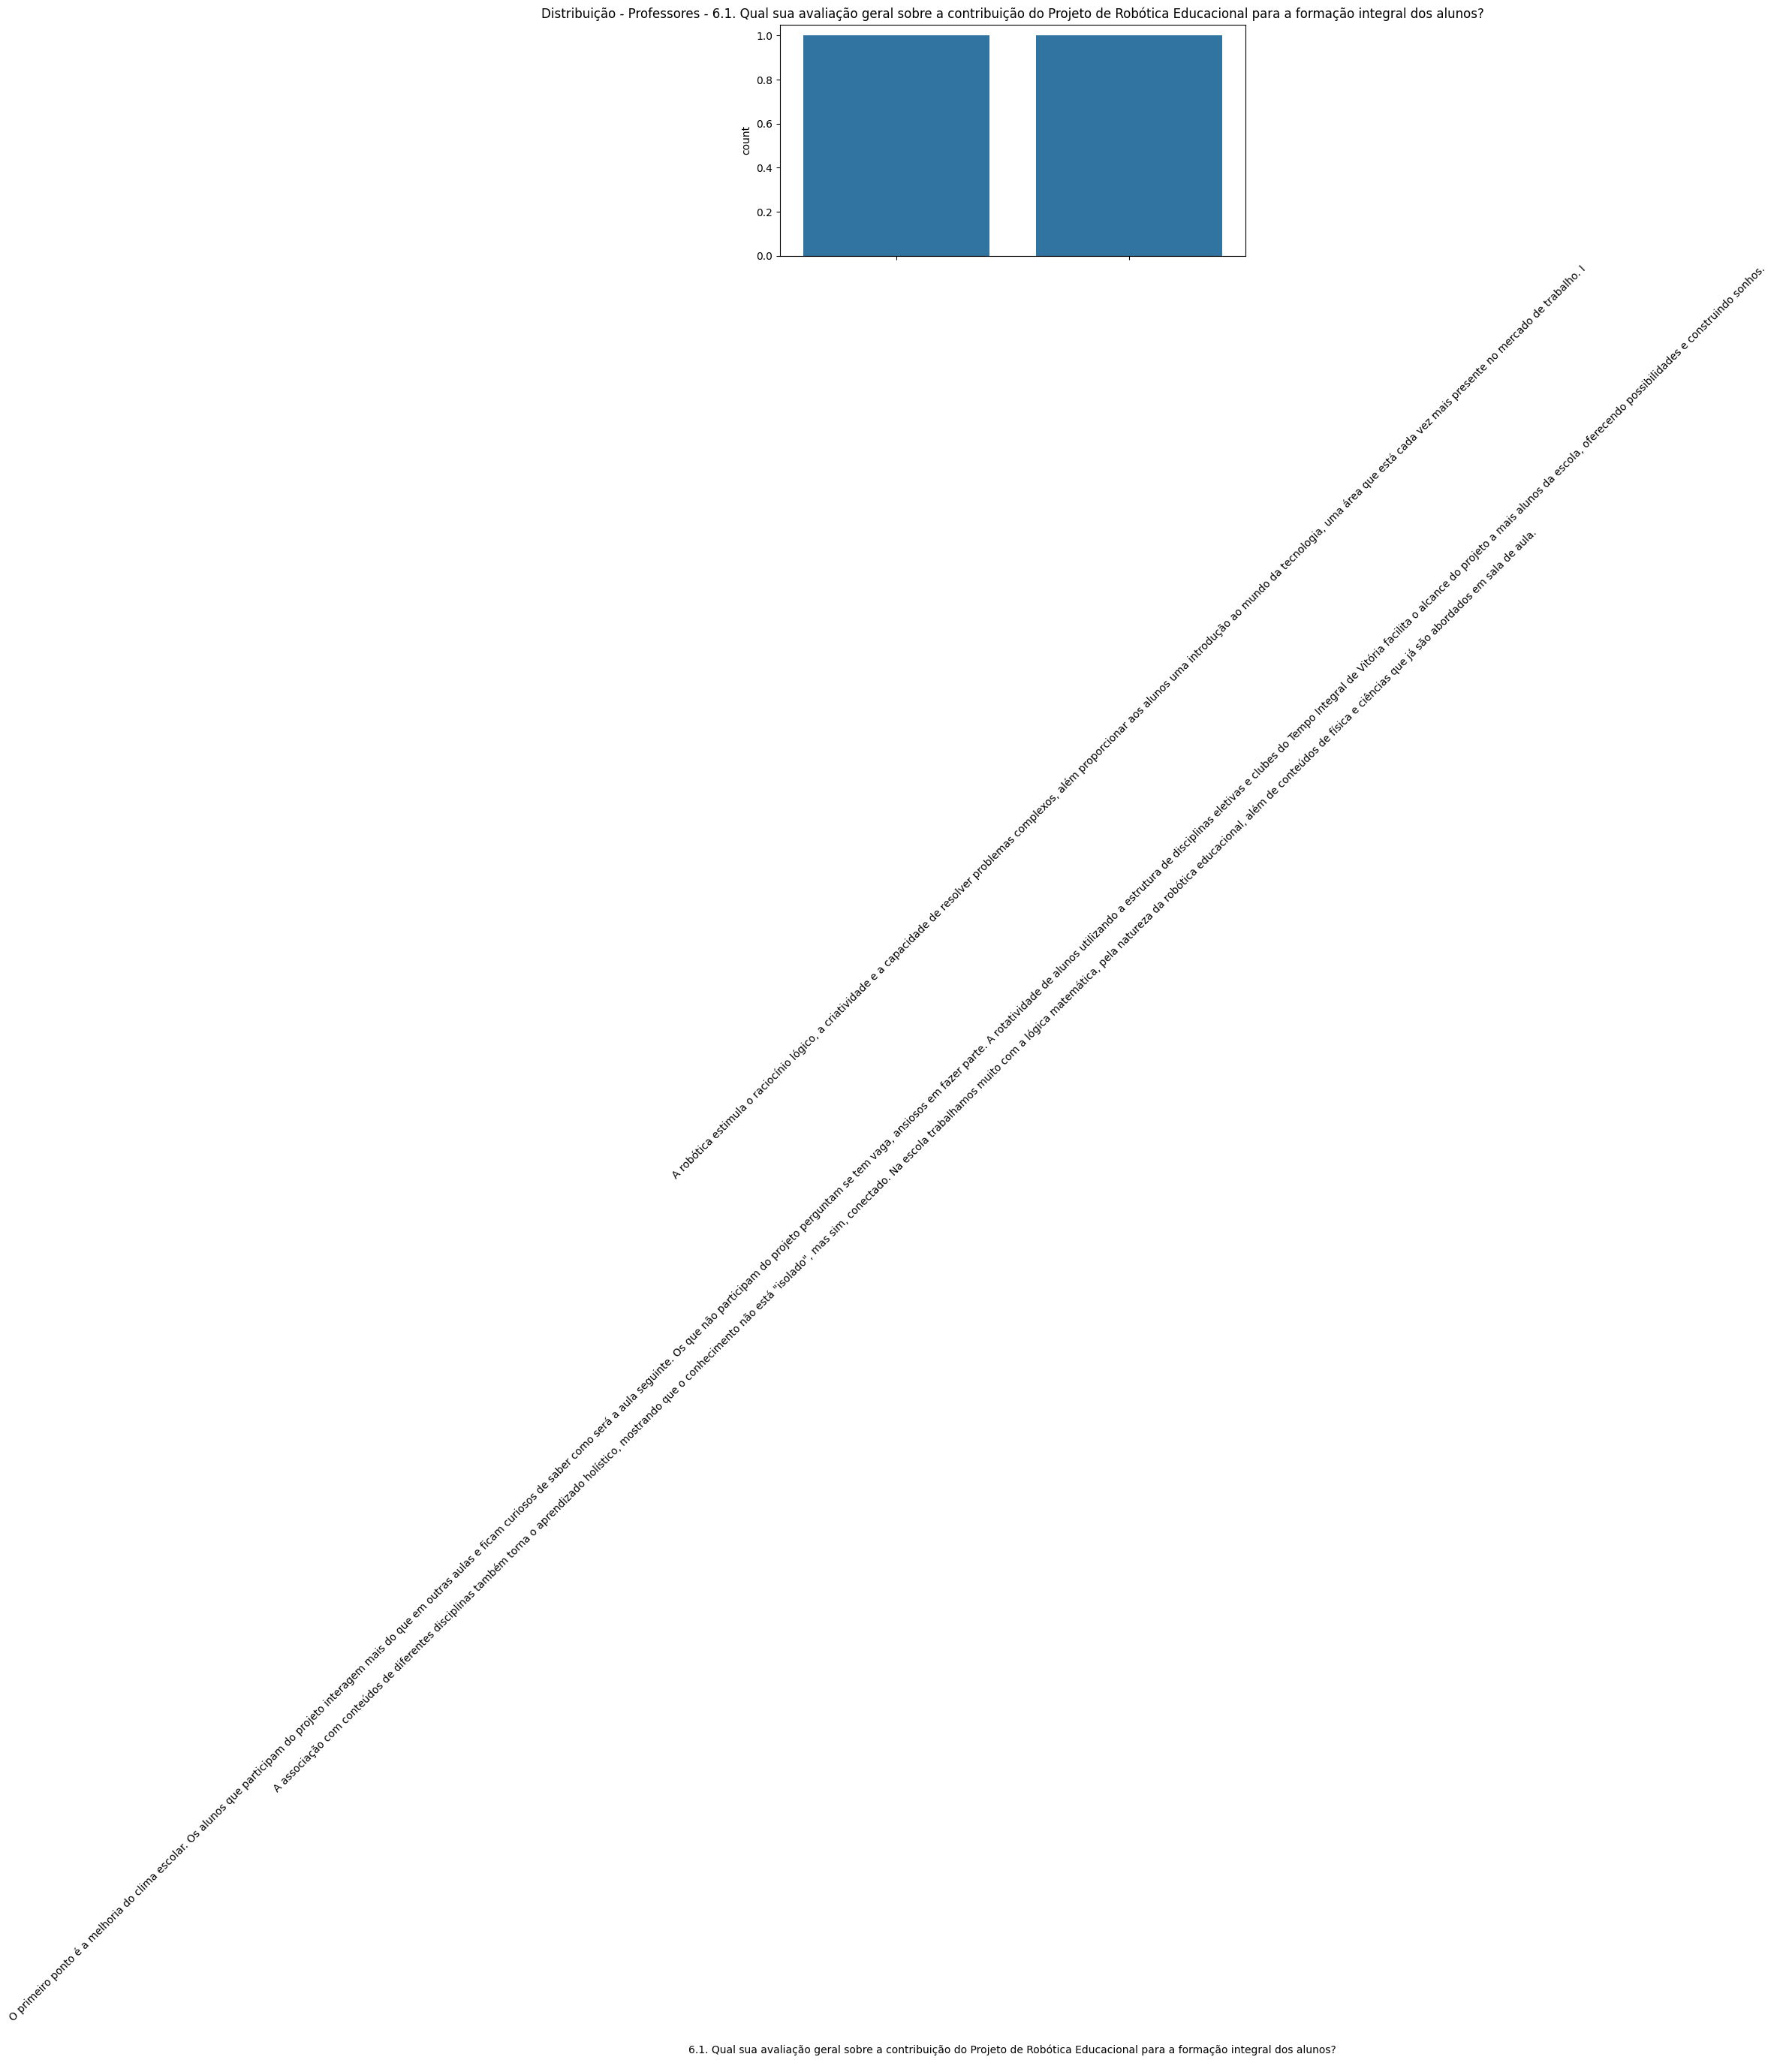


===== Análise Descritiva - Gestão =====
       2.3. Em sua opinião, projetos como o de Robótica Educacional contribuem para a equidade de oportunidades educacionais entre alunos de regiões periféricas?  \
count                                                   3                                                                                                           
unique                                                  2                                                                                                           
top     São fundamentais para ampliar as oportunidades...                                                                                                           
freq                                                    2                                                                                                           

       3.1. Como o(a) senhor(a) avalia o processo de implementação do projeto na escola?  \
count                                    

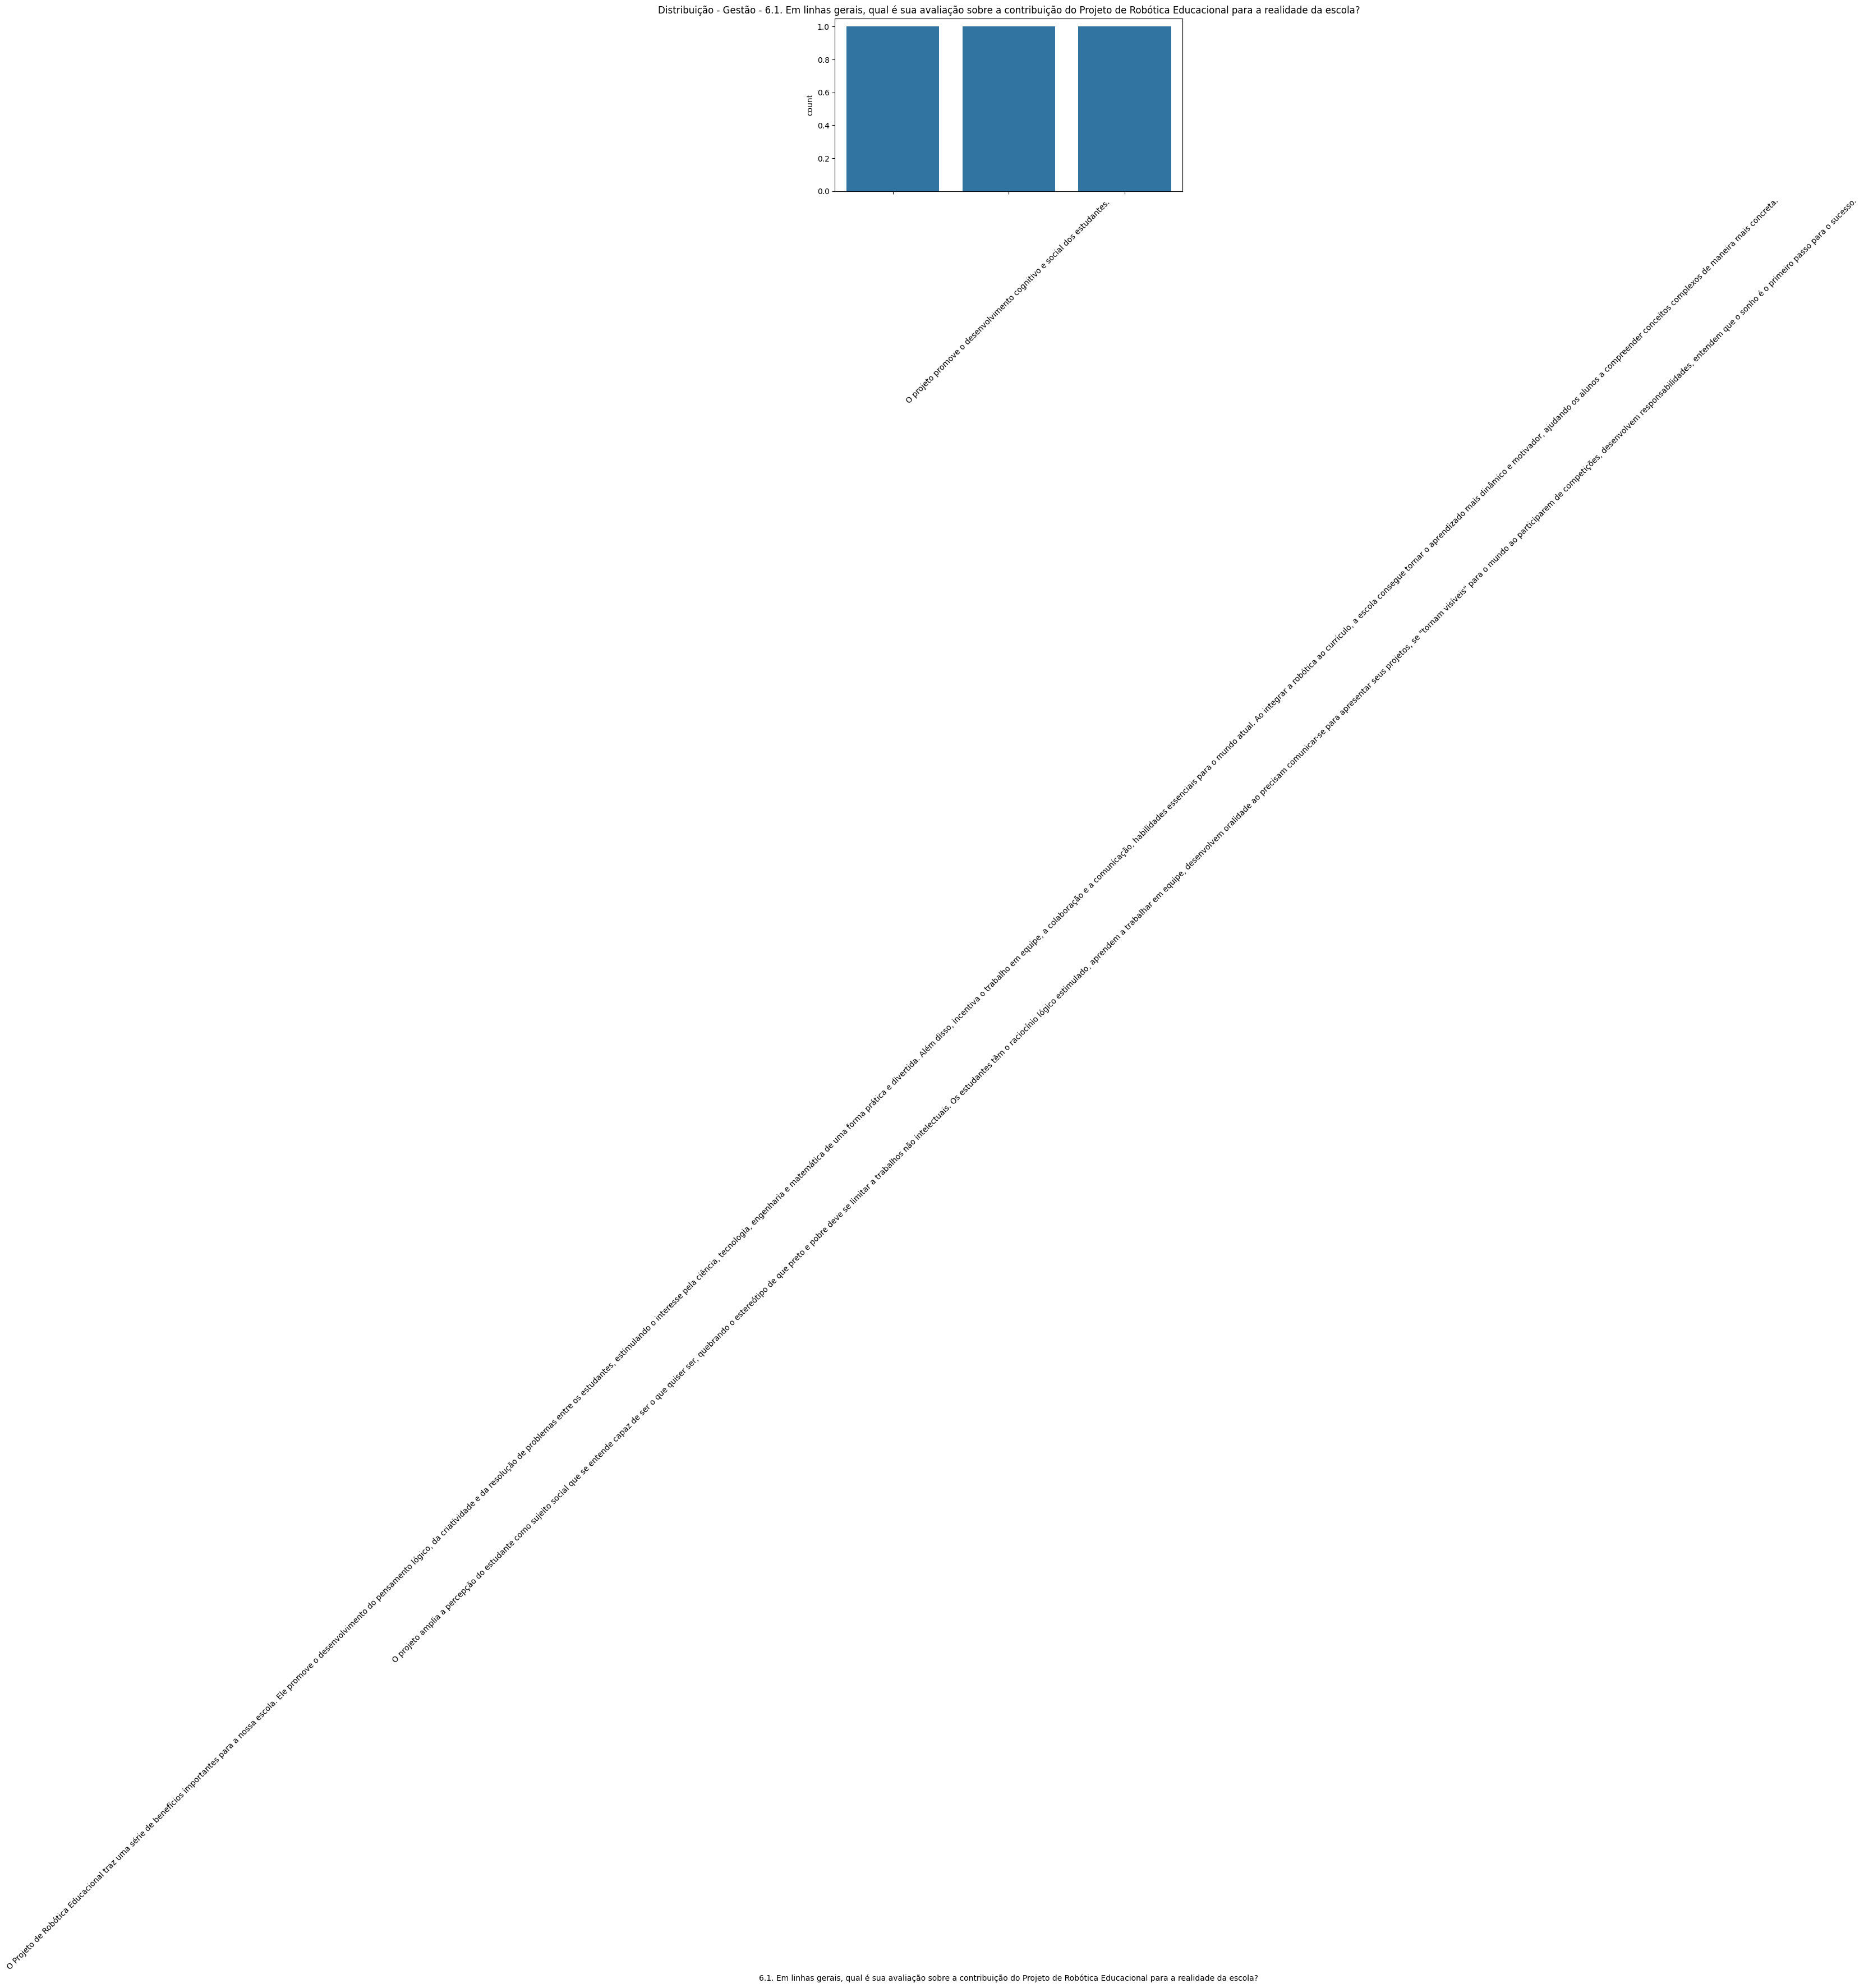


===== Resumo Geral dos Resultados =====
Alunos: {'R² LinearRegression': 0.2954545454545454, 'RMSE LinearRegression': np.float64(0.5935256753272998), 'R² RandomForest': -0.057600000000000096, 'RMSE RandomForest': np.float64(0.7271863585079137)}
Professores: {'R² LinearRegression': nan, 'RMSE LinearRegression': np.float64(1.0), 'R² RandomForest': nan, 'RMSE RandomForest': np.float64(1.0)}
Gestão: {'R² LinearRegression': nan, 'RMSE LinearRegression': np.float64(2.333333333333333), 'R² RandomForest': nan, 'RMSE RandomForest': np.float64(1.78)}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Função para análise descritiva e machine learning por grupo
def processar_grupo(nome_arquivo, features, target, nome_grupo):
    try:
        df = pd.read_excel(nome_arquivo)
        df.columns = df.columns.str.strip()

        # Verificação das colunas
        faltantes = [col for col in features + [target] if col not in df.columns]
        if faltantes:
            print(f"Erro no grupo {nome_grupo}: Colunas não encontradas: {faltantes}")
            return None

        df = df[features + [target]].dropna()

        # Análise descritiva
        print(f"\n===== Análise Descritiva - {nome_grupo} =====")
        print(df.describe(include='all'))

        # Gráfico de distribuição para a coluna alvo
        plt.figure(figsize=(8, 4))
        sns.countplot(x=target, data=df)
        plt.title(f"Distribuição - {nome_grupo} - {target}")
        plt.xticks(rotation=45)
        plt.show()

        # Codificação das variáveis
        le = LabelEncoder()
        for col in df.columns:
            if df[col].dtype == 'object':
                df[col] = le.fit_transform(df[col].astype(str))

        X = df[features]
        y = df[target]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Modelos
        lr = LinearRegression().fit(X_train, y_train)
        y_pred_lr = lr.predict(X_test)
        r2_lr = r2_score(y_test, y_pred_lr)
        rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

        rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        r2_rf = r2_score(y_test, y_pred_rf)
        rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

        resultados = {
            'R² LinearRegression': r2_lr,
            'RMSE LinearRegression': rmse_lr,
            'R² RandomForest': r2_rf,
            'RMSE RandomForest': rmse_rf
        }
        return resultados

    except Exception as e:
        print(f"Erro no grupo {nome_grupo}: {e}")
        return None


# Configuração dos arquivos e colunas
arquivos = {
    'Alunos': 'respostas-alunos.xlsx',
    'Professores': 'respostas-professores.xlsx',
    'Gestão': 'respostas-gestao.xlsx'
}

colunas_por_grupo = {
    'Alunos': {
        'features': [
            '2. QUAL A SUA IDADE?',
            '4. VOCÊ GOSTOU DE PARTICIPAR DAS AULAS DE ROBÓTICA?',
            '8. VOCÊ ACHA QUE APRENDEU COISAS NOVAS COM A ROBÓTICA?',
            '10. O USO DE PEÇAS E ROBÔS AJUDOU VOCÊ A ENTENDER MELHOR OS CONTEÚDOS?'
        ],
        'target': '14. COMO VOCÊ AVALIA SUA EXPERIÊNCIA NAS AULAS DE ROBÓTICA?'
    },
    'Professores': {
        'features': [
            '2.2. Acredita que os projetos de tecnologia, como a robótica, podem mitigar desigualdades educacionais?',
            '2.3. Os alunos demonstraram entusiasmo e envolvimento com as atividades de robótica?',
            '3.3. Em sua percepção, o projeto de robótica contribuiu para a aprendizagem em sua disciplina?',
            '4.3. Considera que seria necessário ampliar a formação dos docentes para utilização de tecnologias educacionais como a robótica?'
        ],
        'target': '6.1. Qual sua avaliação geral sobre a contribuição do Projeto de Robótica Educacional para a formação integral dos alunos?'
    },
    'Gestão': {
        'features': [
            '2.3. Em sua opinião, projetos como o de Robótica Educacional contribuem para a equidade de oportunidades educacionais entre alunos de regiões periféricas?',
            '3.1. Como o(a) senhor(a) avalia o processo de implementação do projeto na escola?',
            '3.2. A infraestrutura da escola atendeu às necessidades do projeto? (marque as opções disponíveis):',
            '5.2. O(a) senhor(a) considera relevante utilizar esses dados no planejamento pedagógico?'
        ],
        'target': '6.1. Em linhas gerais, qual é sua avaliação sobre a contribuição do Projeto de Robótica Educacional para a realidade da escola?'
    }
}

# Processar todos os grupos
resultados_finais = {}

for grupo, arquivo in arquivos.items():
    features = colunas_por_grupo[grupo]['features']
    target = colunas_por_grupo[grupo]['target']
    resultados = processar_grupo(arquivo, features, target, grupo)
    resultados_finais[grupo] = resultados

print("\n===== Resumo Geral dos Resultados =====")
for grupo, res in resultados_finais.items():
    print(f"{grupo}: {res}")
